# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch,
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [4]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [5]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [6]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [7]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

<ipython-input-7-e458ff4bc28e>:2: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


tensor([[-0.0480, -0.0267]])

### Testando o predict da rede

In [8]:
model(Variable(torch.ones((5,2))))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

### Definindo função de perda e otimizador

In [9]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

### Laço de treinamento

In [10]:
num_epochs = 120
w0_list = []
w1_list = []
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)

    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    #loss cálculo da função de perda
    loss = criterion(out, target)

    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/120], loss: 0.024990
Epoch[40/120], loss: 0.022381
Epoch[60/120], loss: 0.021554
Epoch[80/120], loss: 0.021291
Epoch[100/120], loss: 0.021208
Epoch[120/120], loss: 0.021182


## Avaliação

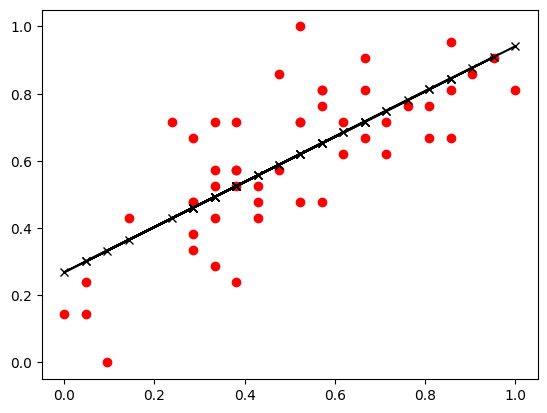

In [11]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

In [12]:
# Predição com os pesos treinados
y_pred = model(Variable(x_train_bias))

loss = criterion(y_pred, Variable(y_train)) # Cálculo da perda (MSE) utilizando a função criterion
print("Perda (MSE) com pesos treinados:", loss.item())

Perda (MSE) com pesos treinados: 0.021181009709835052


<details>
<summary>Mostrar Resultado</summary>

```python
y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)
```

</details>

- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

Solução ótima analítica: tensor([[0.2613, 0.6865]]) 



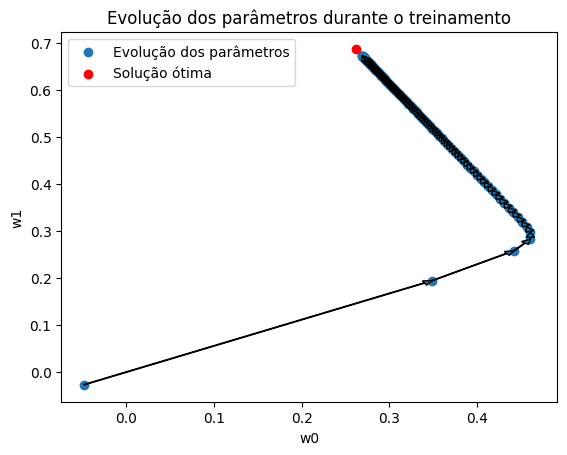

In [27]:
# Plotting the evolution of the parameters
plt.scatter(w0_list, w1_list, label='Evolução dos parâmetros')
w0_old = None

for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None:
        plt.arrow(w0_old, w1_old, w0 - w0_old, w1 - w1_old,
                  head_length=0.01, head_width=0.01, shape='full',
                  length_includes_head=True)
    w0_old, w1_old = w0, w1

# Plotting the optimal solution
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
w_opt = w_opt.t()
print("Solução ótima analítica:", w_opt, "\n")

plt.scatter(w_opt[0, 0].item(), w_opt[0, 1].item(), color='red', label='Solução ótima')
plt.xlabel('w0')
plt.ylabel('w1')
plt.legend()
plt.title('Evolução dos parâmetros durante o treinamento')
plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1
```

</details>

# Aprendizados

#### 1. Regressão Linear com PyTorch

- **Uso de Tensores do PyTorch**:
  - Substituímos operações NumPy por operações equivalentes usando tensores do PyTorch, permitindo aproveitar a diferenciação automática e outras funcionalidades avançadas.

- **Normalização dos Dados**:
  - Normalizamos as entradas e saídas para garantir que os dados estejam em uma escala comparável, o que pode melhorar a eficiência do treinamento.

#### 2. Treinamento de Modelos com PyTorch

- **Criação e Inicialização de Modelos**:
  - Utilizamos `torch.nn.Linear` para criar um modelo de regressão linear e inicializamos os parâmetros de maneira adequada.

- **Forward Pass e Predição**:
  - Implementamos a função `forward` para calcular as previsões do modelo a partir das entradas.

- **Função de Perda**:
  - Calculamos a função de perda (Mean Squared Error) usando a classe `nn.MSELoss`.

- **Backpropagation e Otimização**:
  - Utilizamos `loss.backward()` para calcular os gradientes automaticamente com base no grafo computacional dinâmico construído durante o forward pass.
  - Utilizamos o otimizador `optim.SGD` para atualizar os parâmetros do modelo.

#### 3. Visualização da Evolução dos Parâmetros

- **Armazenamento da Evolução dos Pesos**:
  - Criamos listas para armazenar a evolução dos valores dos pesos `w0` e `w1` durante o treinamento.

- **Visualização da Trajetória dos Pesos**:
  - Utilizamos um scatter plot para visualizar como os parâmetros do modelo evoluem ao longo das iterações de treinamento.

- **Comparação com Solução Ótima**:
  - Calculamos a solução ótima analítica e a marcamos no gráfico para comparar com a trajetória dos parâmetros durante o treinamento.
